# Task 04

##### Dependency recovery task. Manipulation of signs. Dimensionality reduction.

Ex. 01 <br>
<i>Select a suitable data table (must contain numeric and categorical variables).
Temporarily remove categorical features. Construct linear regression.</i>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<i> need to convert ECA into numerical values since it's not numerical </i>

In [4]:
leb_encod = LabelEncoder()
df['Extracurricular Activities'] = leb_encod.fit_transform(df['Extracurricular Activities'])

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


yes are converted into 1 and no into 0

In [6]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

seperated the independent (X) and dependent variable (y) 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression 

In [8]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred_linear = linear_model.predict(X_test)

Evaluating the model 

In [10]:
mse = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error: {mse}')
print('Coefficients:', linear_model.coef_)
print('Intercept:', linear_model.intercept_)

Mean Squared Error: 4.082628398521854
Coefficients: [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
Intercept: -33.92194621555611


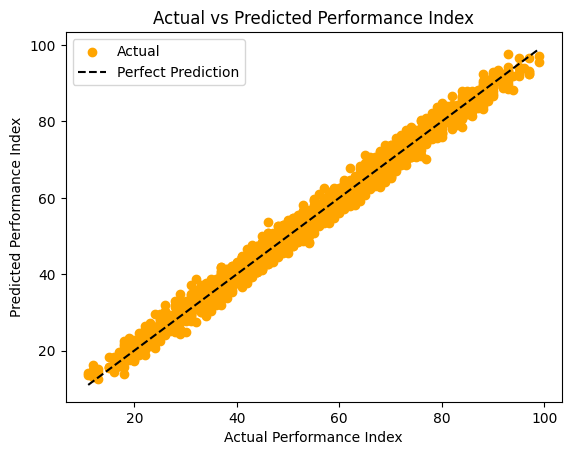

In [11]:
plt.scatter(y_test, y_pred_linear, color='orange', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Perfect Prediction')  
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.legend()
plt.show()

Ex.02  <i>Construct a solution using the boosting method. Compare with linear regression.</i>

#### Gradient Boosting Regressor

In [12]:
boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

Evaluatig both models

In [13]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Squared Error (Gradient Boosting): {mse_boosting}')

Mean Squared Error (Linear Regression): 4.082628398521854
Mean Squared Error (Gradient Boosting): 4.364635848301432


In [14]:
results = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_linear,
    'Gradient Boosting': y_pred_boosting
})

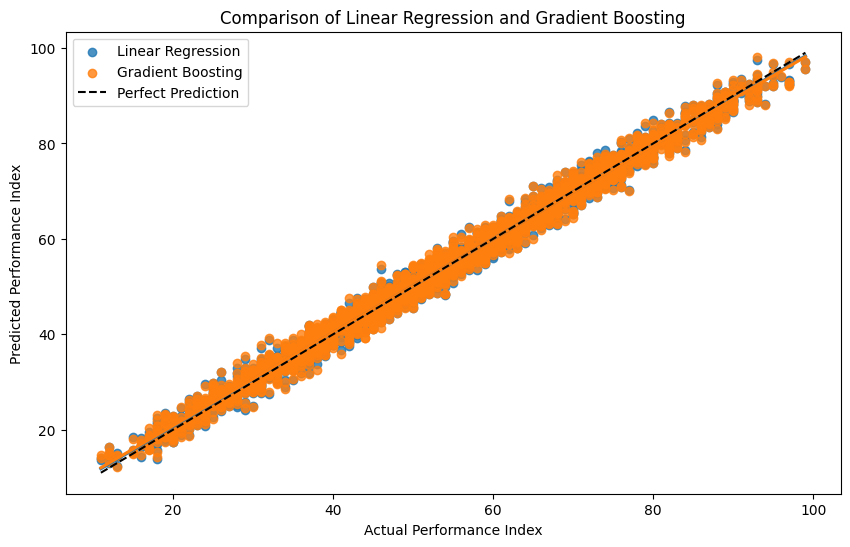

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Linear Regression', data=results, label='Linear Regression')
sns.regplot(x='Actual', y='Gradient Boosting', data=results, label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Perfect Prediction')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Comparison of Linear Regression and Gradient Boosting')
plt.legend()
plt.show()

Ex. 03 <i>Apply one hot and target encoding for categorical features (take data where such features
exist). Compare accuracy.</i>

In [16]:
df_onehot = pd.get_dummies(df, columns=['Extracurricular Activities'], drop_first=True)

In [17]:
target_encoder = TargetEncoder()
df['Extracurricular Activities'] = target_encoder.fit_transform(df['Extracurricular Activities'], df['Performance Index'])

In [18]:
X_onehot = df_onehot.drop('Performance Index', axis=1)
y_onehot = df_onehot['Performance Index']

X_target = df.drop('Performance Index', axis=1)
y_target = df['Performance Index']

In [19]:
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(X_onehot, y_onehot, test_size=0.2, random_state=42)
X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(X_target, y_target, test_size=0.2, random_state=42)

In [20]:
regression_model_onehot = LinearRegression()
regression_model_target = LinearRegression()

In [21]:
regression_model_onehot.fit(X_train_onehot, y_train_onehot)
regression_model_target.fit(X_train_target, y_train_target)

y_pred_onehot = regression_model_onehot.predict(X_test_onehot)
y_pred_target = regression_model_target.predict(X_test_target)

mse_onehot = mean_squared_error(y_test_onehot, y_pred_onehot)
mse_target = mean_squared_error(y_test_target, y_pred_target)

In [22]:
print(f'Mean Squared Error (One-Hot Encoding): {mse_onehot}')
print(f'Mean Squared Error (Target Encoding): {mse_target}')

Mean Squared Error (One-Hot Encoding): 4.0826283985218526
Mean Squared Error (Target Encoding): 4.082628398521854


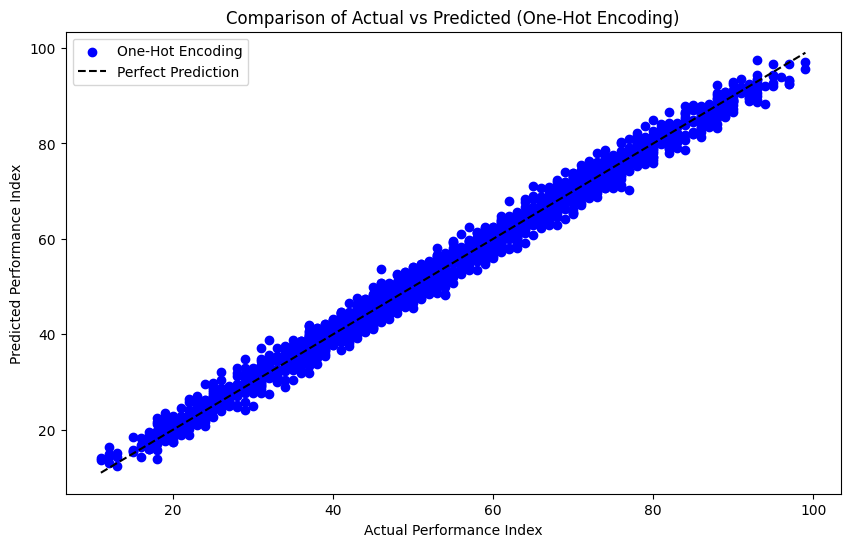

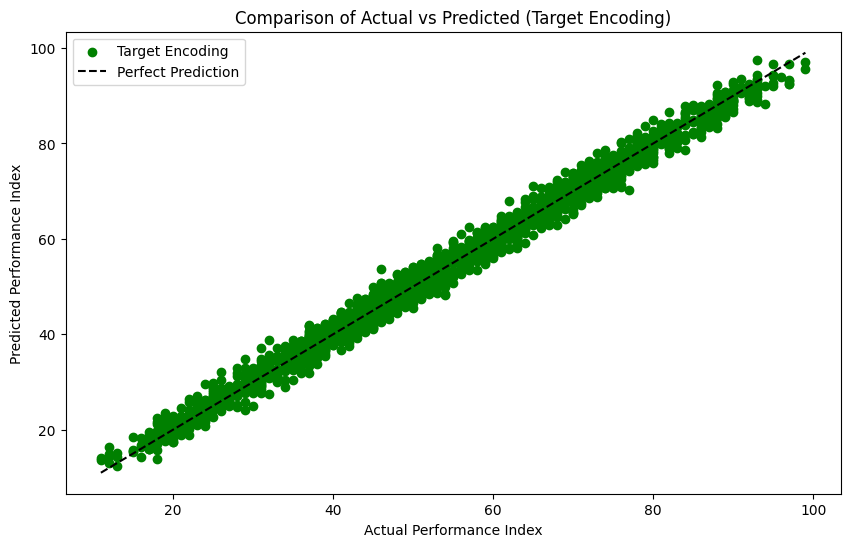

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_onehot, y_pred_onehot, color='blue', label='One-Hot Encoding')
plt.plot([min(y_test_onehot), max(y_test_onehot)], [min(y_test_onehot), max(y_test_onehot)], linestyle='--', color='black', label='Perfect Prediction')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Comparison of Actual vs Predicted (One-Hot Encoding)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_target, y_pred_target, color='green', label='Target Encoding')
plt.plot([min(y_test_target), max(y_test_target)], [min(y_test_target), max(y_test_target)], linestyle='--', color='black', label='Perfect Prediction')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Comparison of Actual vs Predicted (Target Encoding)')
plt.legend()
plt.show()

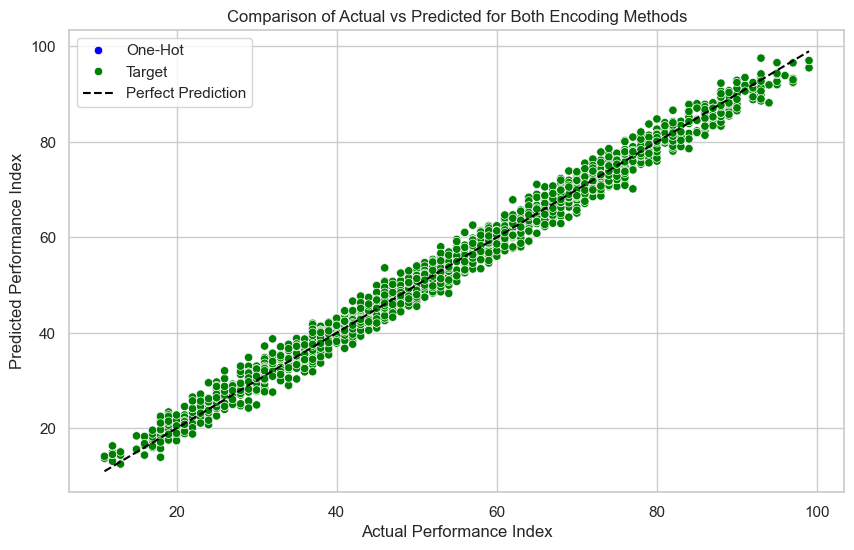

In [24]:
results_onehot = pd.DataFrame({'Actual': y_test_onehot, 'Predicted': y_pred_onehot, 'Encoding Method': 'One-Hot'})
results_target = pd.DataFrame({'Actual': y_test_target, 'Predicted': y_pred_target, 'Encoding Method': 'Target'})
results_combined = pd.concat([results_onehot, results_target])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Encoding Method', data=results_combined, palette={'One-Hot': 'blue', 'Target': 'green'})
plt.plot([min(results_combined['Actual']), max(results_combined['Actual'])], [min(results_combined['Actual']), max(results_combined['Actual'])], linestyle='--', color='black', label='Perfect Prediction')

plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Comparison of Actual vs Predicted for Both Encoding Methods')

plt.legend()
plt.show()

Ex. 04 <i> Visualize objects (not necessarily for the same table) in space main component </i>

In [25]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Standardizing the numerical features

In [26]:
numerical_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [27]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

Creating a DataFrame with the principal components

In [28]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

Combining principal components with the target variable (Performance Index)

In [29]:
final_df = pd.concat([principal_df, df['Performance Index']], axis=1)

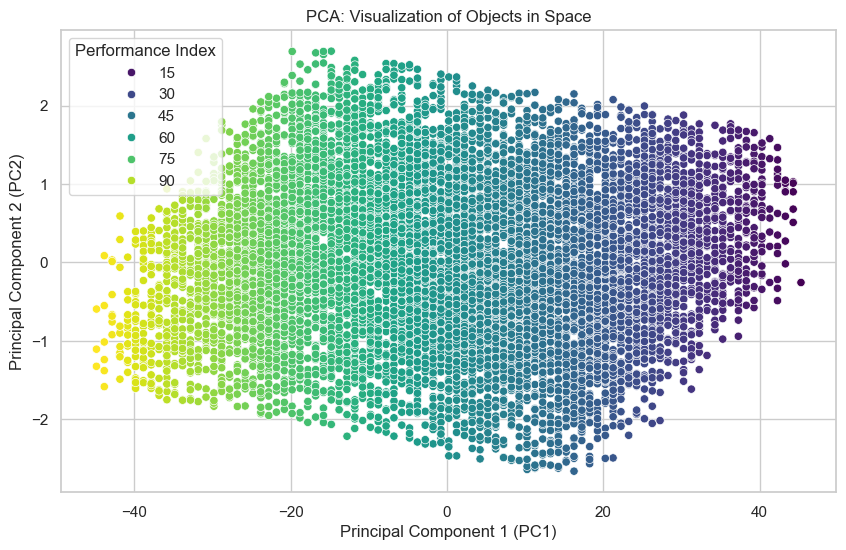

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Performance Index', data=final_df, palette='viridis')
plt.title('PCA: Visualization of Objects in Space')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()